In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pickle

In [4]:
import vdetect

In [5]:
test_images = [mpimg.imread(f) for f in glob('test_images/*.jpg')]

In [6]:
TIMESTAMP = '2018-04-15_113152'

classifiers_file = 'serialize/{0}/classifiers.p'.format(TIMESTAMP)
scaler_file = 'serialize/{0}/scaler.p'.format(TIMESTAMP)
hp_file = 'serialize/{0}/hyper.json'.format(TIMESTAMP)

hyperparams = vdetect.load_json(hp_file)
scaler = vdetect.load_pickle(scaler_file)
classifiers = vdetect.load_pickle(classifiers_file)

extract = vdetect.create_feature_extractor(scaler, hyperparams)

In [15]:
heatmaps = []
for im in test_images:
    
    heatmap = vdetect.sliding_window(im, extract, classifiers.values())
    heatmaps.append(heatmap)    

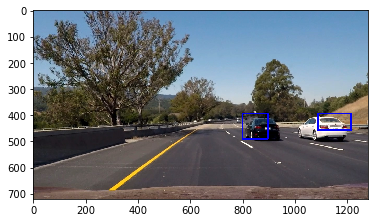

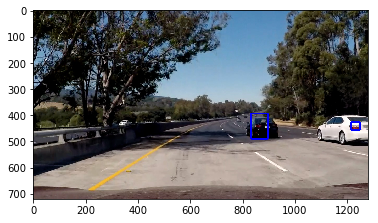

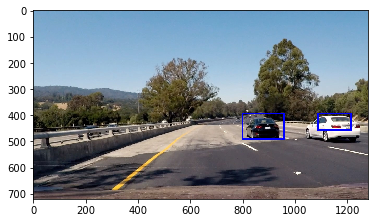

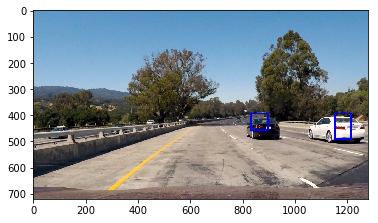

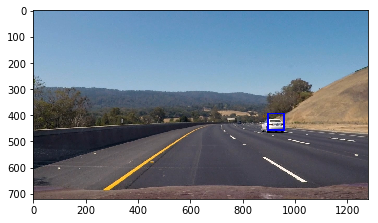

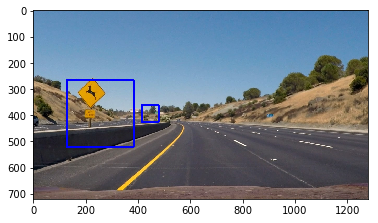

In [77]:
for im, heatmap in zip(test_images, heatmaps):

    thresholded, labels, stats_df, bboxes = vdetect.segment_vehicles(heatmap, 0.7)

    plt.figure()
    plt.imshow(
        vdetect.draw_boxes(im, bboxes)
    )